In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from GeoConformalizedExplainer import GeoConformalizedExplainer

C:\Users\Xiayin\miniconda3\envs\UncertaintyGeoXAI\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('../../data/seattle_sample_3k.csv')

In [3]:
data = gpd.GeoDataFrame(data, crs="EPSG:32610", geometry=gpd.points_from_xy(x=data.UTM_X, y=data.UTM_Y))

In [4]:
data = data.to_crs(4326)

In [5]:
data['lon'] = data['geometry'].get_coordinates()['x']

In [6]:
data['lat'] = data['geometry'].get_coordinates()['y']

In [7]:
data['price'] = np.power(10, data['log_price']) / 10000

In [8]:
y = data.price
X = data[['bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'condition', 'waterfront', 'view', 'age', 'lon', 'lat']]
loc = data[['lon', 'lat']]

In [9]:
X_train, X_temp, y_train, y_temp, loc_train, loc_temp = train_test_split(X, y, loc, train_size=0.8, random_state=42)

In [10]:
X_calib, X_test, y_calib, y_test, loc_calib, loc_test = train_test_split(X_temp, y_temp, loc_temp, train_size=0.5,
                                                                         random_state=42)

In [11]:
model = xgb.XGBRegressor(n_estimators=500, max_depth=3, min_child_weight=1.0, colsample_bytree=1.0)

In [12]:
model.fit(X_train.values, y_train.values)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
feature_names = X_train.columns

In [70]:
explainer = GeoConformalizedExplainer(prediction_f=model.predict,
                                      x_train=X_train,
                                      x_calib=X_calib,
                                      coord_calib=loc_calib.values,
                                      miscoverage_level=0.1,
                                      band_width=0.3,
                                      feature_names=feature_names)

In [71]:
results = explainer.uncertainty_aware_explain(x_test=X_test, coord_test=loc_test)

100%|██████████| 300/300 [02:39<00:00,  1.88it/s]


Explaining Variables


In [72]:
results.accuracy_summary()

,Mean(|SHAP_value|),Uncertainty,R2,RMSE,SHAP_Var,Pred_SHAP_Var
bathrooms,1.579515,2.435586,0.483394,1.521872,4.483291,1.598877
sqft_living,6.548407,5.359608,0.894168,3.099162,90.755139,83.262047
sqft_lot,3.056538,2.911229,0.781159,2.125597,20.645870,13.133061
grade,6.850731,4.579959,0.971270,1.760477,107.876885,97.388380
condition,1.175643,0.616251,0.902162,0.517348,2.735647,2.590900
waterfront,0.895254,0.302793,0.933091,1.280296,24.498211,20.627456
view,2.258791,1.403681,0.896039,1.752260,29.534360,17.995970
age,2.425636,2.928242,0.681502,1.797606,10.145709,6.962943
lon,3.102505,3.400900,0.642389,2.513145,17.661366,9.850023
lat,13.399657,8.130883,0.969714,2.715818,243.532290,236.132009


In [73]:
pred_results = results.result_geo

In [74]:
bathrooms_lower_bound = pred_results.bathrooms_shap - pred_results.bathrooms_geo_uncertainty
bathrooms_upper_bound = pred_results.bathrooms_shap + pred_results.bathrooms_geo_uncertainty
sqft_living_lower_bound = pred_results.sqft_living_shap - pred_results.sqft_living_geo_uncertainty
sqft_living_upper_bound = pred_results.sqft_living_shap + pred_results.sqft_living_geo_uncertainty
sqft_lot_lower_bound = pred_results.sqft_lot_shap - pred_results.sqft_lot_geo_uncertainty
sqft_lot_upper_bound = pred_results.sqft_lot_shap + pred_results.sqft_lot_geo_uncertainty
grade_lower_bound = pred_results.grade_shap - pred_results.grade_geo_uncertainty
grade_upper_bound = pred_results.grade_shap + pred_results.grade_geo_uncertainty
condition_lower_bound = pred_results.condition_shap - pred_results.condition_geo_uncertainty
condition_upper_bound = pred_results.condition_shap + pred_results.condition_geo_uncertainty
waterfront_lower_bound = pred_results.waterfront_shap - pred_results.waterfront_geo_uncertainty
waterfront_upper_bound = pred_results.waterfront_shap + pred_results.waterfront_geo_uncertainty
view_lower_bound = pred_results.view_shap - pred_results.view_geo_uncertainty
view_upper_bound = pred_results.view_shap + pred_results.view_geo_uncertainty
age_lower_bound = pred_results.age_shap - pred_results.age_geo_uncertainty
age_upper_bound = pred_results.age_shap + pred_results.age_geo_uncertainty
lon_lower_bound = pred_results.lon_shap - pred_results.lon_geo_uncertainty
lon_upper_bound = pred_results.lon_shap + pred_results.lon_geo_uncertainty
lat_lower_bound = pred_results.lat_shap - pred_results.lat_geo_uncertainty
lat_upper_bound = pred_results.lat_shap + pred_results.lat_geo_uncertainty

In [75]:
upper_bounds = np.array([bathrooms_upper_bound.values, sqft_living_upper_bound.values, sqft_lot_upper_bound.values,
                         grade_upper_bound.values, condition_upper_bound.values, waterfront_upper_bound.values,
                         view_upper_bound.values, age_upper_bound.values, lon_upper_bound.values,
                         lat_upper_bound.values])
lower_bounds = np.array([bathrooms_lower_bound.values, sqft_living_lower_bound.values, sqft_lot_lower_bound.values,
                         grade_lower_bound.values, condition_lower_bound.values, waterfront_lower_bound.values,
                         view_lower_bound.values, age_lower_bound.values, lon_lower_bound.values,
                         lat_lower_bound.values])

In [119]:
np.save('../../data/upper_bounds.npy', upper_bounds)
np.save('../../data/lower_bounds.npy', lower_bounds)

In [14]:
upper_bounds = np.load('../../data/upper_bounds.npy')
lower_bounds = np.load('../../data/lower_bounds.npy')

In [15]:
explanation_values = np.load('../../data/bootstrap_predictions.npy')

In [16]:
explanation_values

array([[[ 2.34352196e+00,  1.33808321e+01, -3.81127885e+00, ...,
          4.08275422e+00, -4.97616243e+00,  1.02971849e+01],
        [-2.89181603e+00, -5.39934651e+00,  4.93623207e-02, ...,
         -7.41666544e-01,  1.06274193e+00, -1.44758354e+01],
        [-1.05797659e+00, -6.85136490e+00, -1.66745901e+00, ...,
         -5.81693082e-01, -1.31745281e-01,  2.91535879e+00],
        ...,
        [ 4.85241912e+00,  1.42799896e+01,  9.97491232e+00, ...,
          2.86930567e+00, -2.20853457e+00,  1.85387429e+01],
        [-1.54347192e+00, -2.05032141e+00, -1.20402051e+00, ...,
          3.74585691e+00,  1.10040301e+00,  1.51873336e+01],
        [-1.83763228e+00, -5.96020460e+00, -2.81995117e+00, ...,
          8.84627767e+00,  8.35968830e+00, -1.55788604e+01]],

       [[ 2.37903447e+00,  1.17768139e+01,  6.68210438e-01, ...,
          4.24110908e+00, -3.59268306e+00,  8.42067876e+00],
        [-1.97999935e+00, -7.10426663e+00,  2.64791777e+00, ...,
          2.05438333e+00,  4.80505900e

In [17]:
explanation_values.shape

(2000, 300, 10)

In [18]:
upper_bounds.shape

(10, 300)

In [19]:
explanation_values[0, :, 9]

array([ 1.02971849e+01, -1.44758354e+01,  2.91535879e+00,  5.78046899e+00,
       -5.19526242e+00,  1.18492503e+01, -1.49668258e+01,  2.91672127e+00,
       -4.00714344e+00,  1.60965299e+01, -1.70110588e+00, -3.41765009e+00,
       -1.29866750e+01, -2.30587021e+01,  1.72469914e+01, -2.28292868e+01,
       -4.42280722e-01, -1.74155209e+01, -2.22780267e+01,  7.64321117e+00,
        9.05540615e+00,  1.39843349e+00,  1.73594699e+01, -1.23800237e+01,
        5.62325368e+00, -7.18078837e+00,  1.62562912e+01, -2.54374402e+01,
       -1.78898925e+00, -1.73439418e+01, -2.39742953e+00, -2.23793185e+01,
        1.18037790e+01,  1.39439500e+01,  9.54795957e+00,  5.80696337e+00,
       -1.58416375e+01, -9.59316078e+00,  1.39541608e+01,  7.06317279e+00,
        1.73419103e+01,  1.66419042e+01, -1.96954682e+01,  1.50870465e+01,
        1.34012963e+01, -5.06893140e+00,  1.24394890e+01, -1.78585856e+01,
       -7.41222036e+00,  4.76788888e+00, -1.22461377e+01, -2.10312616e+01,
        4.81783698e+00, -

In [20]:
upper_bounds[9, :]

array([ 1.65595392e+01, -7.65865950e+00,  8.42900976e+00,  1.67148102e+01,
        3.79755188e+00,  2.06724323e+01, -7.18216214e+00,  1.28746333e+01,
        3.93156780e+00,  2.09051986e+01,  5.86276904e+00,  4.64263941e+00,
       -5.46988293e+00, -1.58349417e+01,  2.32313044e+01, -1.62694182e+01,
        9.26376729e+00, -1.09549305e+01, -1.53612775e+01,  1.52991427e+01,
        1.48174185e+01,  1.69813343e+01,  2.44602430e+01, -6.79802372e+00,
        1.10727936e+01, -1.45942146e-01,  2.11695054e+01, -1.85808994e+01,
        7.24267807e+00, -8.90613354e+00,  3.14755990e+00, -1.42554060e+01,
        2.04184799e+01,  1.85715145e+01,  2.64612656e+01,  1.76668515e+01,
       -8.14629338e+00, -1.44791487e+00,  2.14182836e+01,  1.37123919e+01,
        2.29354320e+01,  2.29599130e+01, -1.18390732e+01,  1.88647412e+01,
        2.00174642e+01,  2.69436958e+00,  2.06624351e+01, -9.90694006e+00,
        8.93709593e-01,  1.30952040e+01, -5.68260655e+00, -1.10402384e+01,
        4.51417794e+00, -

In [21]:
coverage_rate_list = {}

for k in range(explanation_values.shape[2]):
    upper_bound = upper_bounds[k].reshape(1, -1)
    lower_bound = lower_bounds[k].reshape(1, -1)
    kth_explanation_values = explanation_values[:, :, k]
    coverage_rate = np.mean((kth_explanation_values <= upper_bound) & (kth_explanation_values >= lower_bound), axis=1)
    coverage_rate_list[f'{feature_names[k]}'] = coverage_rate

In [22]:
coverage_rate_df = pd.DataFrame(coverage_rate_list, columns=feature_names)

In [122]:
coverage_rate_df.to_csv('../../data/coverage_rate.csv', index=False)

In [23]:
coverage_rate_df.shape

(2000, 10)

In [24]:
coverage_rate_df_ = coverage_rate_df.melt(ignore_index=True)

In [25]:
coverage_rate_df_.columns = ['Feature', 'Coverage Rate']

In [26]:
coverage_rate_df_['Coverage Rate (%)'] = coverage_rate_df_['Coverage Rate'] * 100

In [27]:
coverage_rate_df

,bathrooms,sqft_living,sqft_lot,grade,condition,waterfront,view,age,lon,lat
0,0.920000,0.920000,0.860000,0.940000,0.440000,0.830000,0.960000,0.903333,0.893333,0.983333
1,0.950000,0.940000,0.803333,0.933333,0.676667,0.123333,0.943333,0.956667,0.886667,0.970000
2,0.933333,0.900000,0.876667,0.940000,0.736667,0.923333,0.933333,0.886667,0.860000,0.983333
3,0.943333,0.900000,0.890000,0.966667,0.720000,0.890000,0.953333,0.916667,0.906667,0.973333
4,0.933333,0.943333,0.873333,0.963333,0.556667,0.980000,0.956667,0.900000,0.926667,0.976667
...,...,...,...,...,...,...,...,...,...,...
1995,0.950000,0.933333,0.840000,0.946667,0.723333,0.976667,0.946667,0.843333,0.883333,0.980000
1996,0.946667,0.936667,0.850000,0.930000,0.710000,0.946667,0.940000,0.860000,0.866667,0.980000
1997,0.946667,0.936667,0.870000,0.956667,0.670000,0.523333,0.943333,0.906667,0.896667,0.980000
1998,0.953333,0.946667,0.836667,0.960000,0.630000,0.980000,0.936667,0.903333,0.876667,0.983333


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
import matplotlib.font_manager

fpaths = matplotlib.font_manager.findSystemFonts()
font_names = []

for i in fpaths:
    f = matplotlib.font_manager.get_font(i)
    font_names.append(f.family_name)

sorted_font_names = np.sort(font_names)

In [55]:
sorted_font_names

array(['Adobe Devanagari', 'Adobe Devanagari', 'Adobe Devanagari',
       'Adobe Devanagari', 'Agency FB', 'Agency FB', 'Algerian', 'Arial',
       'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial',
       'Arial', 'Arial Rounded MT Bold', 'Bahnschrift',
       'Baskerville Old Face', 'Bauhaus 93', 'Bell MT', 'Bell MT',
       'Bell MT', 'Berlin Sans FB', 'Berlin Sans FB',
       'Berlin Sans FB Demi', 'Bernard MT Condensed', 'Blackadder ITC',
       'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT',
       'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT', 'Bodoni MT',
       'Bodoni MT', 'Book Antiqua', 'Book Antiqua', 'Book Antiqua',
       'Book Antiqua', 'Bookman Old Style', 'Bookman Old Style',
       'Bookman Old Style', 'Bookman Old Style', 'Bookshelf Symbol 7',
       'Bradley Hand ITC', 'Britannic Bold', 'Broadway',
       'Brush Script MT', 'Calibri', 'Calibri', 'Calibri', 'Calibri',
       'Calibri', 'Calibri', 'Californian FB', 'Californian FB',


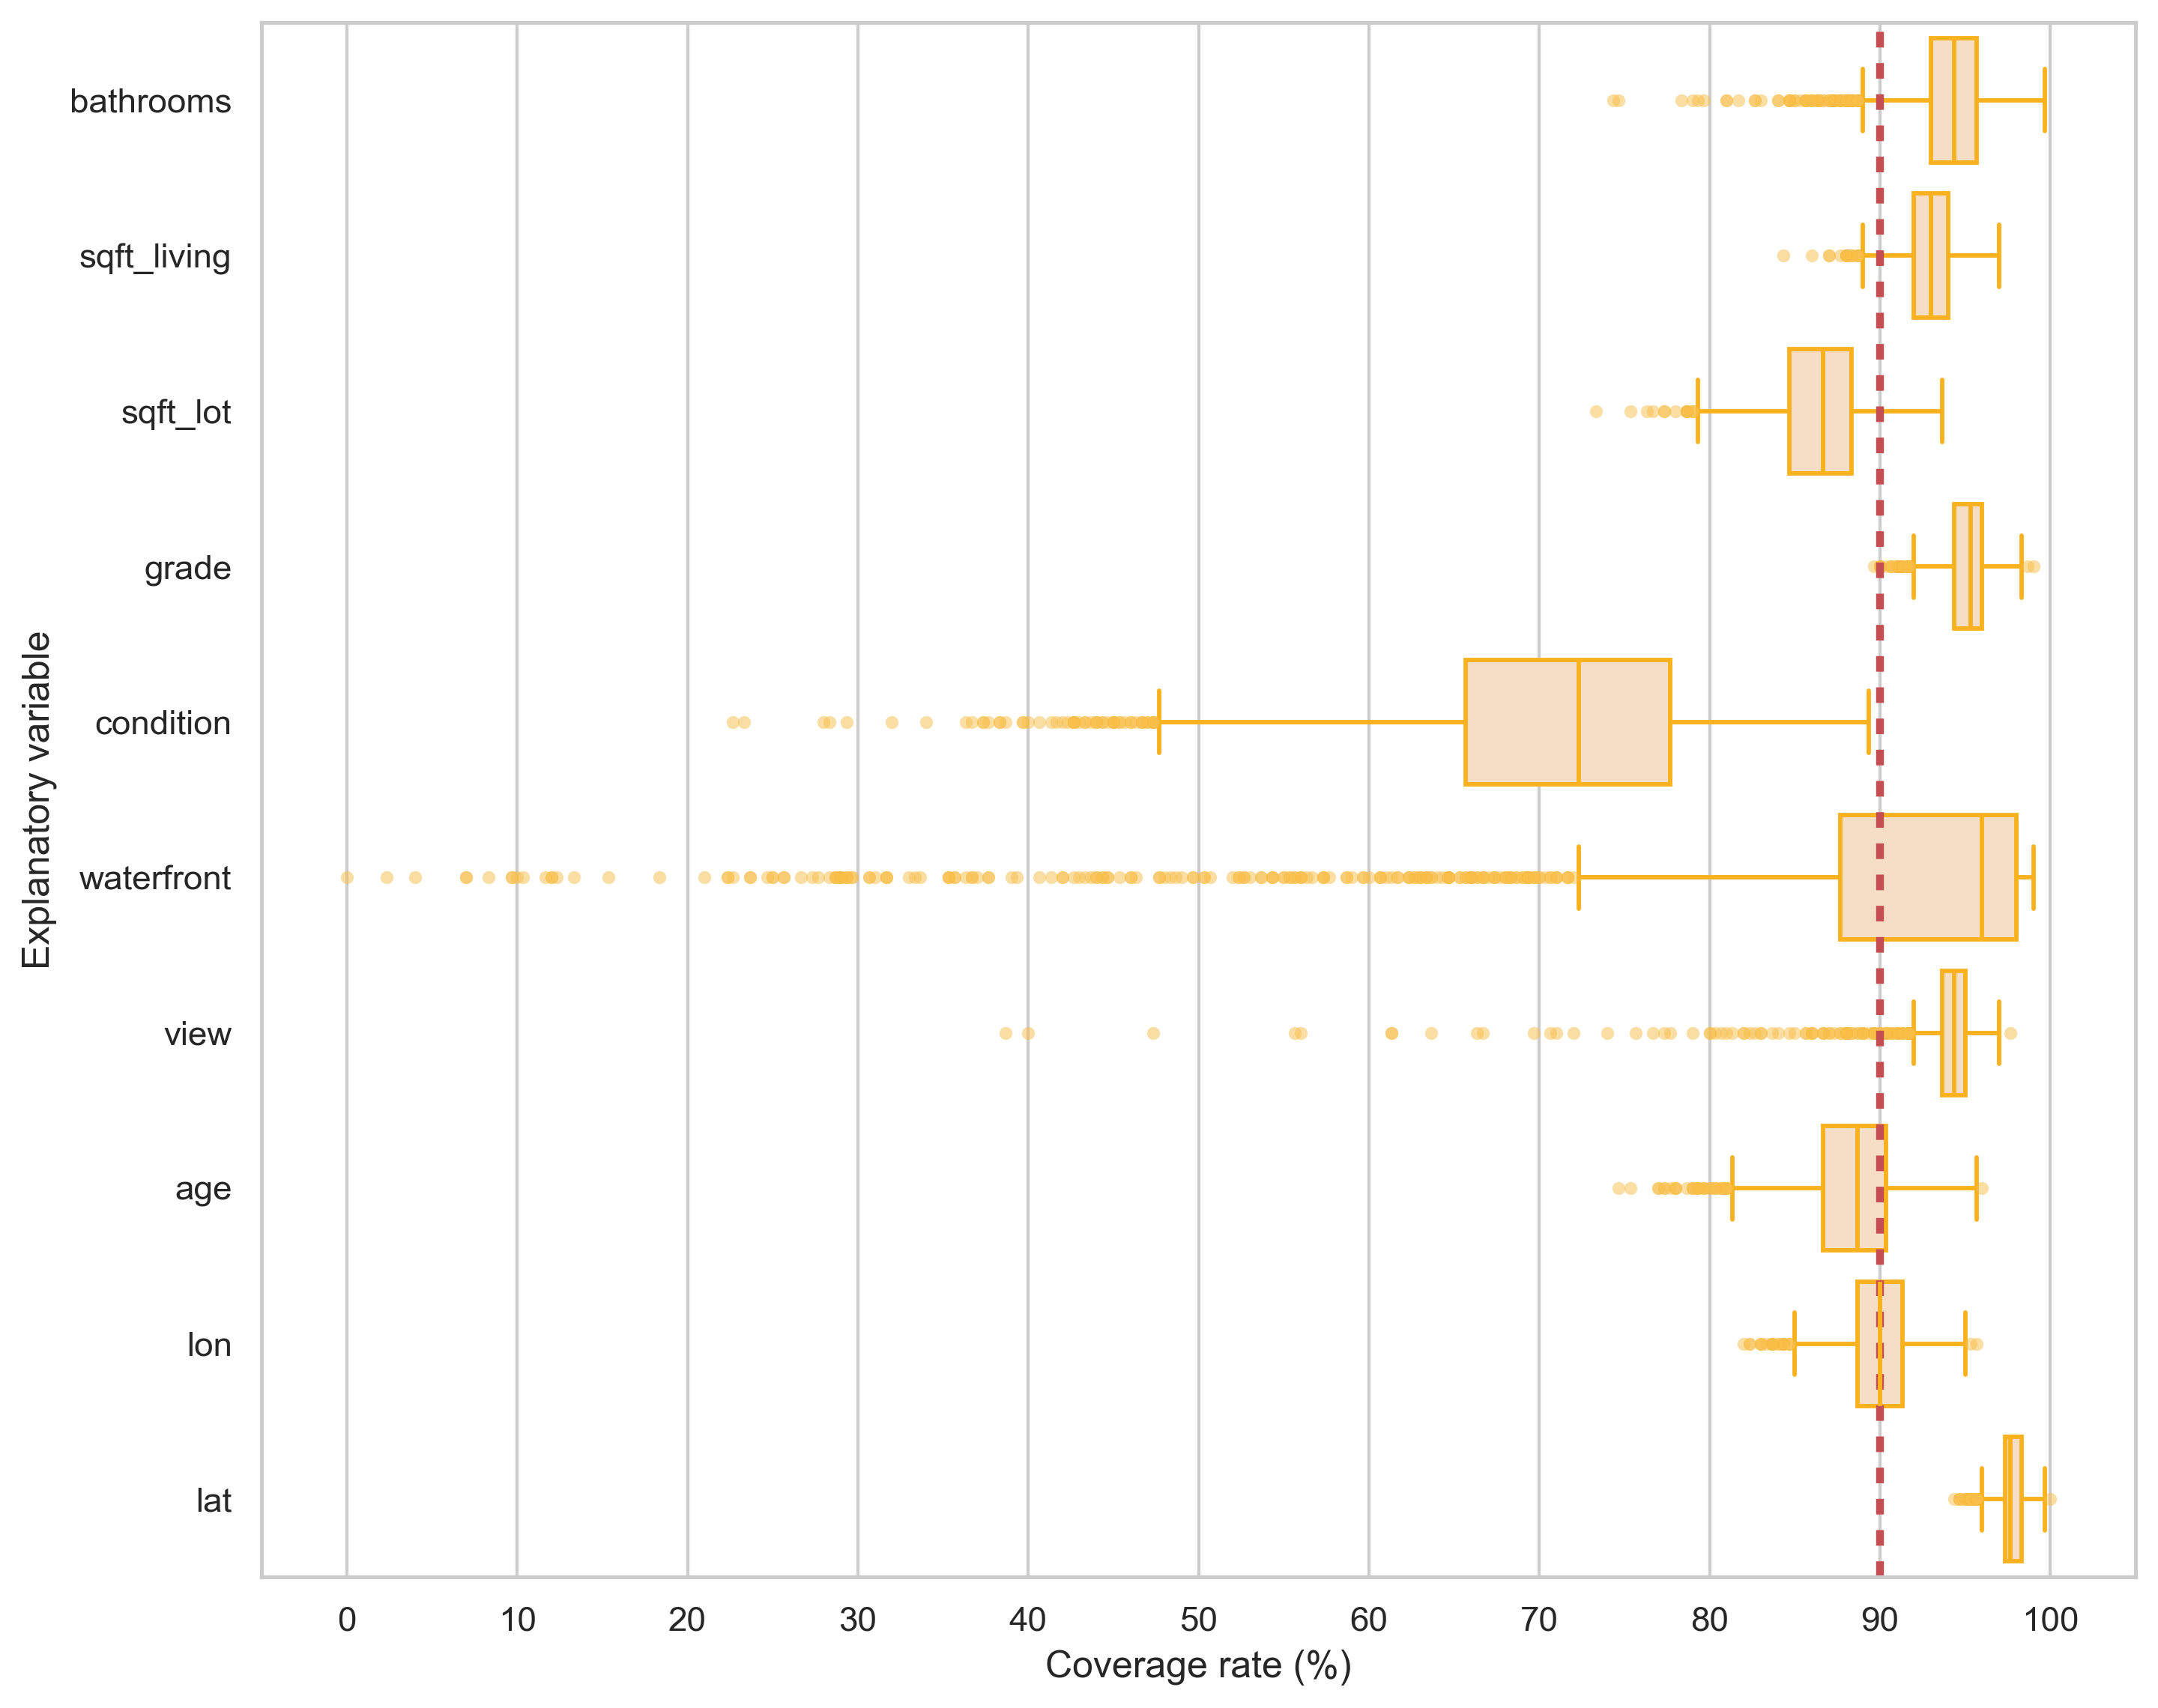

In [56]:
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(dpi=300, figsize=(10, 8))

plt.rcParams['font.family'] = ['SF Pro Text']
plt.rcParams['font.size'] = 20

sns.boxplot(coverage_rate_df_, y='Feature', x='Coverage Rate (%)', linewidth=1.4, color='#fedebe', fliersize=4,
            linecolor='#fab11e',
            flierprops={'markerfacecolor': '#f9be48', 'linewidth': .02, 'alpha': 0.5, 'markeredgewidth': 0.08}, ax=ax)

ax.set_xlabel('Coverage rate (%)')
ax.set_ylabel('Explanatory variable')

ax.axvline(90, color='r', dashes=(2, 2), linewidth=2.5)

ax.set_xticks(np.arange(0, 101, 10))

plt.tight_layout()

plt.savefig('../Figure_X_coverage_boxplot_re_new.pdf', dpi=300, bbox_inches='tight')

In [25]:
coverage_rate_list_new = {}

for k in range(explanation_values.shape[2]):
    upper_bound = upper_bounds[k].reshape(1, -1)
    lower_bound = lower_bounds[k].reshape(1, -1)
    kth_explanation_values = explanation_values[:, :, k]
    coverage_rate = np.mean((kth_explanation_values <= upper_bound) & (kth_explanation_values >= lower_bound), axis=0)
    coverage_rate_list_new[f'{feature_names[k]}'] = coverage_rate

In [26]:
coverage_rate_new_df = pd.DataFrame(coverage_rate_list_new, columns=feature_names)

In [27]:
coverage_rate_new_df.shape

(300, 10)

In [28]:
coverage_rate_new_df

,bathrooms,sqft_living,sqft_lot,grade,condition,waterfront,view,age,lon,lat
0,0.9115,0.8970,0.8435,0.9575,0.5185,0.7905,0.9795,0.5710,0.9030,0.9850
1,0.9975,1.0000,0.9810,1.0000,0.8670,0.9115,1.0000,0.9825,0.9710,1.0000
2,0.9950,0.9995,0.9800,1.0000,0.9130,0.8760,0.6275,0.9720,0.9650,0.9995
3,0.9830,0.9855,0.6980,0.9995,0.4880,0.9165,0.9960,0.5960,0.9675,0.9975
4,0.9985,1.0000,0.9400,1.0000,0.7225,0.9545,0.9995,0.9960,0.9600,1.0000
...,...,...,...,...,...,...,...,...,...,...
295,0.9340,1.0000,0.9915,1.0000,0.7840,0.9850,0.9975,0.9895,0.9225,1.0000
296,0.9995,1.0000,0.9990,1.0000,0.9360,0.9515,0.9945,0.9950,0.9965,1.0000
297,0.9630,0.4980,0.5905,0.9955,0.3385,0.6900,0.4820,0.7325,0.6345,0.9665
298,0.9860,1.0000,0.9125,1.0000,0.9210,0.8950,0.5160,0.9555,0.9840,0.9995


In [133]:
coverage_rate_new_df.to_csv('../../data/coverage_rate_new.csv', index=False)

In [29]:
coverage_rate_new_df_ = coverage_rate_new_df.melt(ignore_index=True)
coverage_rate_new_df_.columns = ['Feature', 'Coverage Rate']

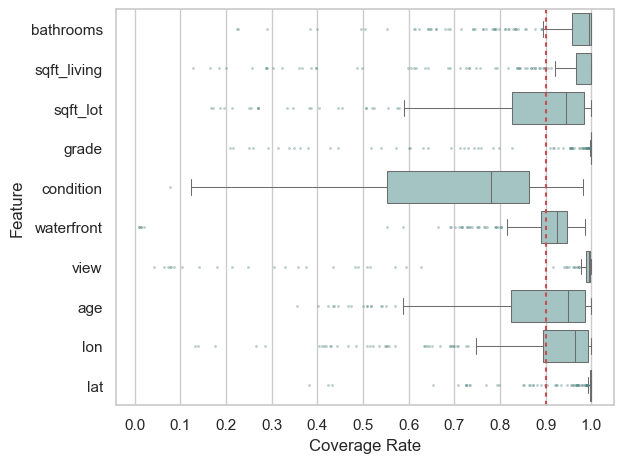

In [35]:
sns.set_theme(style='whitegrid')

ax = sns.boxplot(coverage_rate_new_df_, y='Feature', x='Coverage Rate', linewidth=.75, color='#9fc8c8', fliersize=2,
                 flierprops={'markerfacecolor': '#568b87', 'linewidth': .02, 'alpha': 0.4, 'markeredgewidth': 0.02})

ax.axvline(0.9, color='r', dashes=(2, 2), linewidth=1.5)

ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()

# plt.savefig('../seattle_house_price_coverage_point.pdf', dpi=300, bbox_inches='tight')

In [30]:
coverage_rate_new_df

,bathrooms,sqft_living,sqft_lot,grade,condition,waterfront,view,age,lon,lat
0,0.9115,0.8970,0.8435,0.9575,0.5185,0.7905,0.9795,0.5710,0.9030,0.9850
1,0.9975,1.0000,0.9810,1.0000,0.8670,0.9115,1.0000,0.9825,0.9710,1.0000
2,0.9950,0.9995,0.9800,1.0000,0.9130,0.8760,0.6275,0.9720,0.9650,0.9995
3,0.9830,0.9855,0.6980,0.9995,0.4880,0.9165,0.9960,0.5960,0.9675,0.9975
4,0.9985,1.0000,0.9400,1.0000,0.7225,0.9545,0.9995,0.9960,0.9600,1.0000
...,...,...,...,...,...,...,...,...,...,...
295,0.9340,1.0000,0.9915,1.0000,0.7840,0.9850,0.9975,0.9895,0.9225,1.0000
296,0.9995,1.0000,0.9990,1.0000,0.9360,0.9515,0.9945,0.9950,0.9965,1.0000
297,0.9630,0.4980,0.5905,0.9955,0.3385,0.6900,0.4820,0.7325,0.6345,0.9665
298,0.9860,1.0000,0.9125,1.0000,0.9210,0.8950,0.5160,0.9555,0.9840,0.9995


In [31]:
coverage_rate_new_df['x'] = X_test['lon'].values

In [32]:
coverage_rate_new_df['y'] = X_test['lat'].values

In [33]:
coverage_rate_new_df.shape

(300, 12)

In [34]:
coverage_rate_new_gdf = gpd.GeoDataFrame(coverage_rate_new_df, crs="EPSG:4326",
                                         geometry=gpd.points_from_xy(x=coverage_rate_new_df.x,
                                                                     y=coverage_rate_new_df.y))

In [35]:
coverage_rate_new_gdf

,bathrooms,sqft_living,sqft_lot,grade,condition,waterfront,view,age,lon,lat,x,y,geometry
0,0.9115,0.8970,0.8435,0.9575,0.5185,0.7905,0.9795,0.5710,0.9030,0.9850,-122.178,47.6948,POINT (-122.17800 47.69480)
1,0.9975,1.0000,0.9810,1.0000,0.8670,0.9115,1.0000,0.9825,0.9710,1.0000,-122.364,47.5030,POINT (-122.36400 47.50300)
2,0.9950,0.9995,0.9800,1.0000,0.9130,0.8760,0.6275,0.9720,0.9650,0.9995,-122.360,47.5659,POINT (-122.36000 47.56590)
3,0.9830,0.9855,0.6980,0.9995,0.4880,0.9165,0.9960,0.5960,0.9675,0.9975,-122.304,47.5880,POINT (-122.30400 47.58800)
4,0.9985,1.0000,0.9400,1.0000,0.7225,0.9545,0.9995,0.9960,0.9600,1.0000,-122.288,47.5412,POINT (-122.28800 47.54120)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.9340,1.0000,0.9915,1.0000,0.7840,0.9850,0.9975,0.9895,0.9225,1.0000,-122.127,47.6557,POINT (-122.12700 47.65570)
296,0.9995,1.0000,0.9990,1.0000,0.9360,0.9515,0.9945,0.9950,0.9965,1.0000,-122.242,47.2630,POINT (-122.24200 47.26300)
297,0.9630,0.4980,0.5905,0.9955,0.3385,0.6900,0.4820,0.7325,0.6345,0.9665,-122.405,47.6420,POINT (-122.40500 47.64200)
298,0.9860,1.0000,0.9125,1.0000,0.9210,0.8950,0.5160,0.9555,0.9840,0.9995,-122.359,47.6797,POINT (-122.35900 47.67970)


In [44]:
from math import ceil
from typing import List, Any
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cx


def plot_geo_coverage(data: gpd.GeoDataFrame, feature_names: List[str], max_cols: int = 5, figsize: List[int] = None,
                      crs: Any = gcrs.WebMercator(),
                      filename: str = None, shrink: float = 0.8, basemap: bool = True, cmap: str = 'flare'):
    plt.style.use('default')
    K = len(feature_names)
    n_cols = min(K, max_cols)
    n_rows = ceil(K / n_cols)

    if figsize is None:
        figsize = [30, n_rows * 5]

    fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=figsize, subplot_kw={'projection': crs})
    for i in range(len(feature_names)):
        row = int(i // n_cols)
        col = i - row * n_cols
        ax = axes[row][col]

        name = feature_names[i]

        ax.set_title(name, fontsize=18)

        if basemap:
            gplt.webmap(data, projection=crs, provider=cx.providers.CartoDB.Positron, ax=ax)

        ax.set_axis_on()

        gplt.pointplot(data, legend_var='hue', hue=name,
                       cmap=cmap, legend=True, legend_kwargs={'shrink': shrink}, ax=ax)
        plt.tight_layout()

    for ax in axes.flat:
        if not ax.has_data():  # Check if the subplot contains data
            fig.delaxes(ax)
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [41]:
from matplotlib.colors import LinearSegmentedColormap

In [62]:
cover_colors = ['#63717a', '#eca777']

cover_cmap = LinearSegmentedColormap.from_list('gradient', colors=cover_colors, N=256)

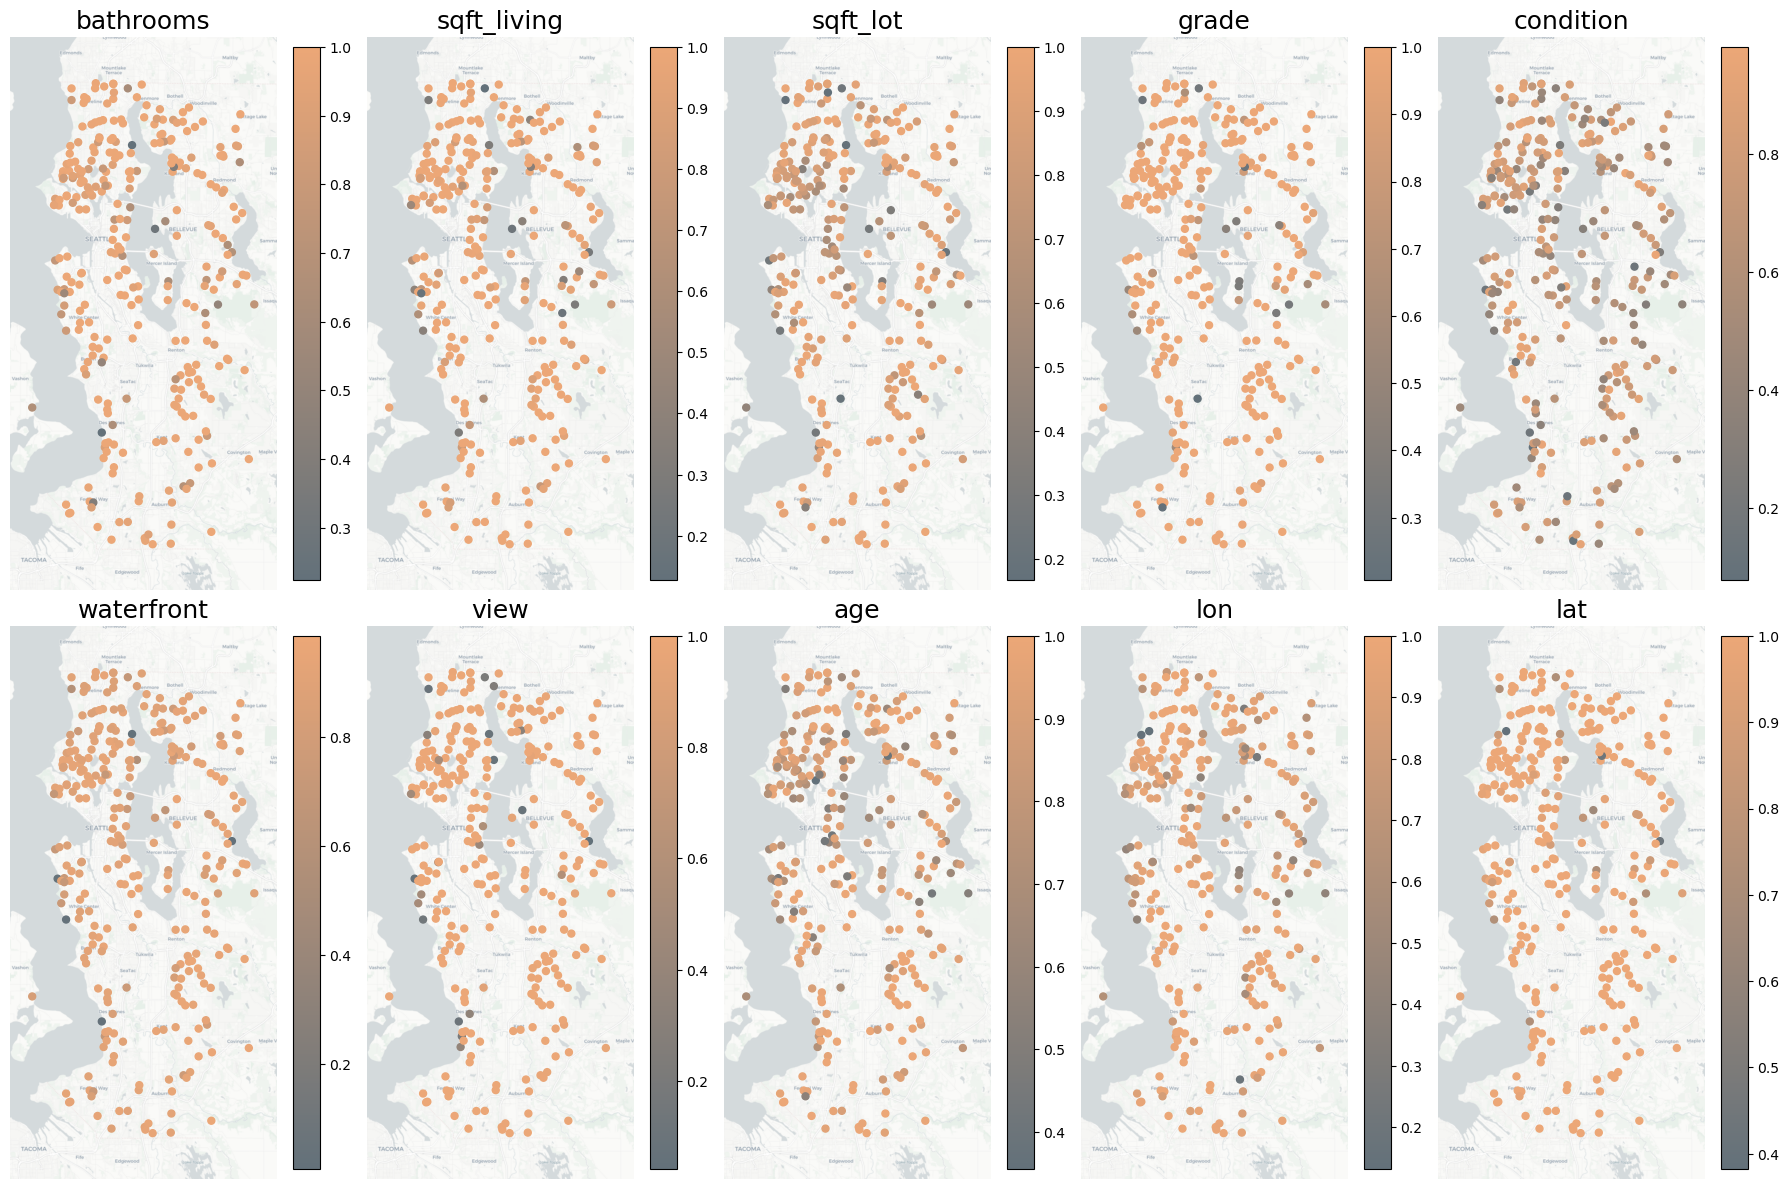

In [63]:
plot_geo_coverage(coverage_rate_new_gdf, feature_names, max_cols=5, figsize=[18, 12], shrink=0.95, cmap=cover_cmap,
                  filename='../Figure_X_coverage_spatial_re_new.pdf')

In [58]:
explanation_values.shape

(2000, 300, 10)

In [59]:
shap_values_one_time = (lower_bounds + upper_bounds) / 2

In [62]:
shap_values_one_time = shap_values_one_time.transpose()

In [63]:
shap_values_one_time.shape

(300, 10)

In [367]:
bootstrap_explanation_values = explanation_values[:, 35, :]

In [368]:
bootstrap_explanation_values.shape

(2000, 10)

In [369]:
bootstrap_explanation_values

array([[-2.25565433, -7.65034412, -2.56574437, ...,  0.28162024,
        -1.81106267,  5.80696337],
       [-1.20074215, -7.99874331, -1.88143462, ...,  0.36296431,
        -1.80594251,  4.91678536],
       [-0.34230976, -9.53177253, -0.2805728 , ...,  0.30368494,
        -1.46043462,  9.26462164],
       ...,
       [-1.02842422, -7.95702955, -1.46171164, ...,  0.0504166 ,
        -2.54988826,  8.80376289],
       [-2.38885922, -8.18389234, -1.18216012, ...,  1.27763279,
        -0.99121332,  8.19022825],
       [-2.89780013, -8.70954965, -0.85858353, ...,  0.54897689,
        -1.75392163,  4.03849042]])

In [370]:
a_shap_values_one_time = shap_values_one_time[35, :]

In [371]:
a_shap_values_one_time

array([-0.31588034, -8.01789529, -0.83525765, -7.28117564,  0.91941672,
       -0.1875125 , -1.4554468 ,  0.82576584, -0.59436899, 10.27913512])

In [372]:
df_bootstrap_explanation_values = pd.DataFrame(bootstrap_explanation_values, columns=feature_names)

In [373]:
df_bootstrap_explanation_values

,bathrooms,sqft_living,sqft_lot,grade,condition,waterfront,view,age,lon,lat
0,-2.255654,-7.650344,-2.565744,-8.496620,1.483030,-0.365788,-1.468203,0.281620,-1.811063,5.806963
1,-1.200742,-7.998743,-1.881435,-7.331874,1.687691,-0.648205,-1.219932,0.362964,-1.805943,4.916785
2,-0.342310,-9.531773,-0.280573,-8.283241,0.550227,-0.136691,-1.871556,0.303685,-1.460435,9.264622
3,-0.816830,-7.024784,-1.404994,-8.521103,1.464528,-0.190717,-1.546939,1.450031,-0.711042,8.086741
4,1.264353,-8.632629,-0.287360,-7.430467,0.553978,-0.204745,-0.583046,-0.687490,-1.707282,7.878458
...,...,...,...,...,...,...,...,...,...,...
1995,0.262084,-11.496620,-4.632868,-7.298610,0.872575,-0.202698,-0.782915,0.545133,-2.154107,7.561540
1996,-1.313523,-9.969837,-2.918896,-6.623399,1.139489,-0.164995,-0.442077,0.098388,-2.168975,6.176326
1997,-1.028424,-7.957030,-1.461712,-9.436228,1.589707,-0.430130,-2.192280,0.050417,-2.549888,8.803763
1998,-2.388859,-8.183892,-1.182160,-7.614051,1.335044,-0.249921,-0.165347,1.277633,-0.991213,8.190228


In [374]:
bootstrap_explanation_values.max(axis=0)

array([ 1.72762576, -2.88871484,  2.76748862, -4.29234543,  3.05146393,
        0.04043955, -0.06975901,  4.23073394,  2.27656978, 14.03050959])

In [375]:
bootstrap_explanation_values.min(axis=0)

array([ -4.37523263, -16.26927696,  -6.22658056, -11.18761766,
        -0.39549814,  -0.78910145,  -3.13937946,  -2.29604948,
        -5.68425749,  -1.03096658])

In [376]:
ranges = np.abs(bootstrap_explanation_values.max(axis=0) - bootstrap_explanation_values.min(axis=0))

In [377]:
ranges

array([ 6.10285839, 13.38056212,  8.99406919,  6.89527223,  3.44696207,
        0.829541  ,  3.06962045,  6.52678343,  7.96082727, 15.06147617])

In [378]:
df_bootstrap_explanation_values_melt = df_bootstrap_explanation_values.melt()

In [379]:
df_bootstrap_explanation_values_melt.columns = ['Explanatory variable', 'Shapley value']

In [380]:
df_bootstrap_explanation_values_melt['uncertainty'] = 0

In [381]:
for i, feature_name in enumerate(feature_names):
    for j in range(df_bootstrap_explanation_values_melt.shape[0]):
        if df_bootstrap_explanation_values_melt.iloc[j, 0] == feature_name:
            df_bootstrap_explanation_values_melt.iloc[j, 2] = ranges[i]

C:\Users\Xiayin\AppData\Local\Temp\ipykernel_3112\3327558617.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.102858388232804' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_bootstrap_explanation_values_melt.iloc[j, 2] = ranges[i]


In [382]:
df_bootstrap_explanation_values_melt

,Explanatory variable,Shapley value,uncertainty
0,bathrooms,-2.255654,6.102858
1,bathrooms,-1.200742,6.102858
2,bathrooms,-0.342310,6.102858
3,bathrooms,-0.816830,6.102858
4,bathrooms,1.264353,6.102858
...,...,...,...
19995,lat,7.561540,15.061476
19996,lat,6.176326,15.061476
19997,lat,8.803763,15.061476
19998,lat,8.190228,15.061476


In [383]:
np.floor(np.min(bootstrap_explanation_values.min(axis=0)))

-17.0

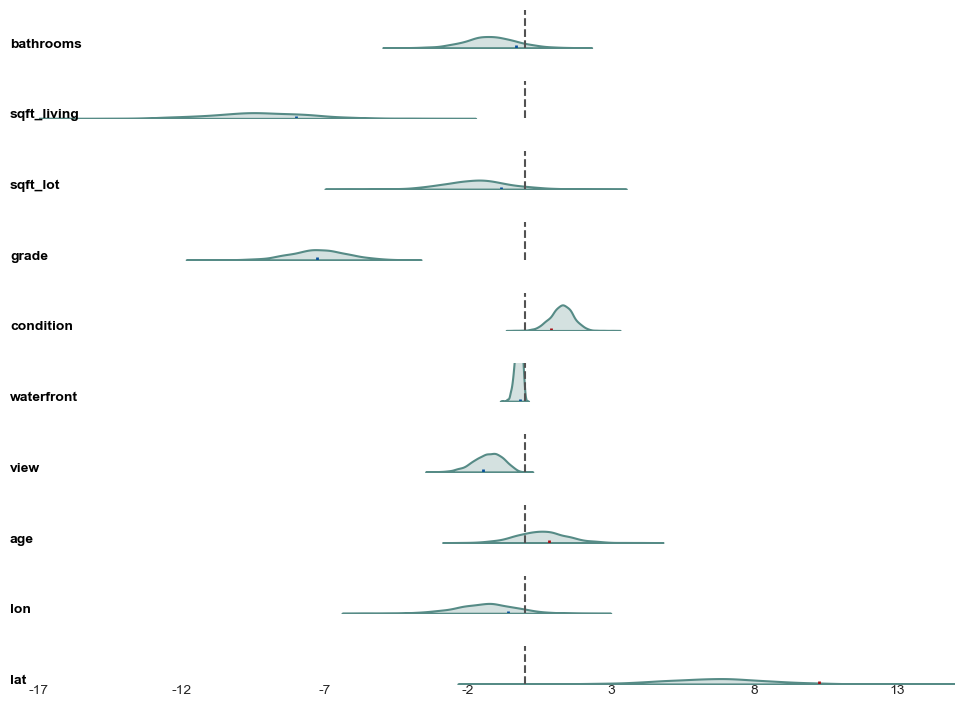

In [384]:
fig, axs = plt.subplots(nrows=len(feature_names), ncols=1, figsize=(10, 7.5))
axs = axs.flatten()  # needed to access each individual axis

x_min = int(np.floor(np.min(bootstrap_explanation_values.min(axis=0))))
x_max = int(np.ceil(np.max(bootstrap_explanation_values.max(axis=0))))

plt.rcParams['font.family'] = 'Arial'
xticks_values = range(x_min, x_max, 5)
point_colors = ['#a50f15' if e >= 0 else '#08519c' for e in a_shap_values_one_time]

# iterate over axes
for i, feature_name in enumerate(feature_names):

    # subset the data for each word
    subset = df_bootstrap_explanation_values_melt[
        df_bootstrap_explanation_values_melt['Explanatory variable'] == feature_name]

    g = sns.kdeplot(
        subset['Shapley value'],
        fill=True,
        bw_adjust=1,
        ax=axs[i],
        color='#568b86',
        linewidth=1.5,
    )

    # set title and labels
    axs[i].set_xlim(x_min, x_max)
    axs[i].set_ylim(0, 1.5)
    axs[i].set_ylabel('')
    axs[i].set_axis_off()

    axs[i].text(
        x_min - 1, 0,
        feature_name,
        ha='left',
        fontsize=10,
        color='black',
        fontfamily='Arial',
        fontweight='bold'
    )

    axs[i].vlines(a_shap_values_one_time[i], -0.1, 0.1, color=point_colors[i], linewidths=2)

    axs[i].axvline(0, color='#525252', linestyle='--')

    if i == len(feature_names) - 1:
        if i == len(feature_names) - 1:
            for value in xticks_values:
                axs[i].text(
                    value, -0.4,
                    f'{value}',
                    ha='center',
                    fontsize=10
                )
plt.tight_layout()
plt.savefig('./bootstrapping_distribution.pdf')
plt.show()


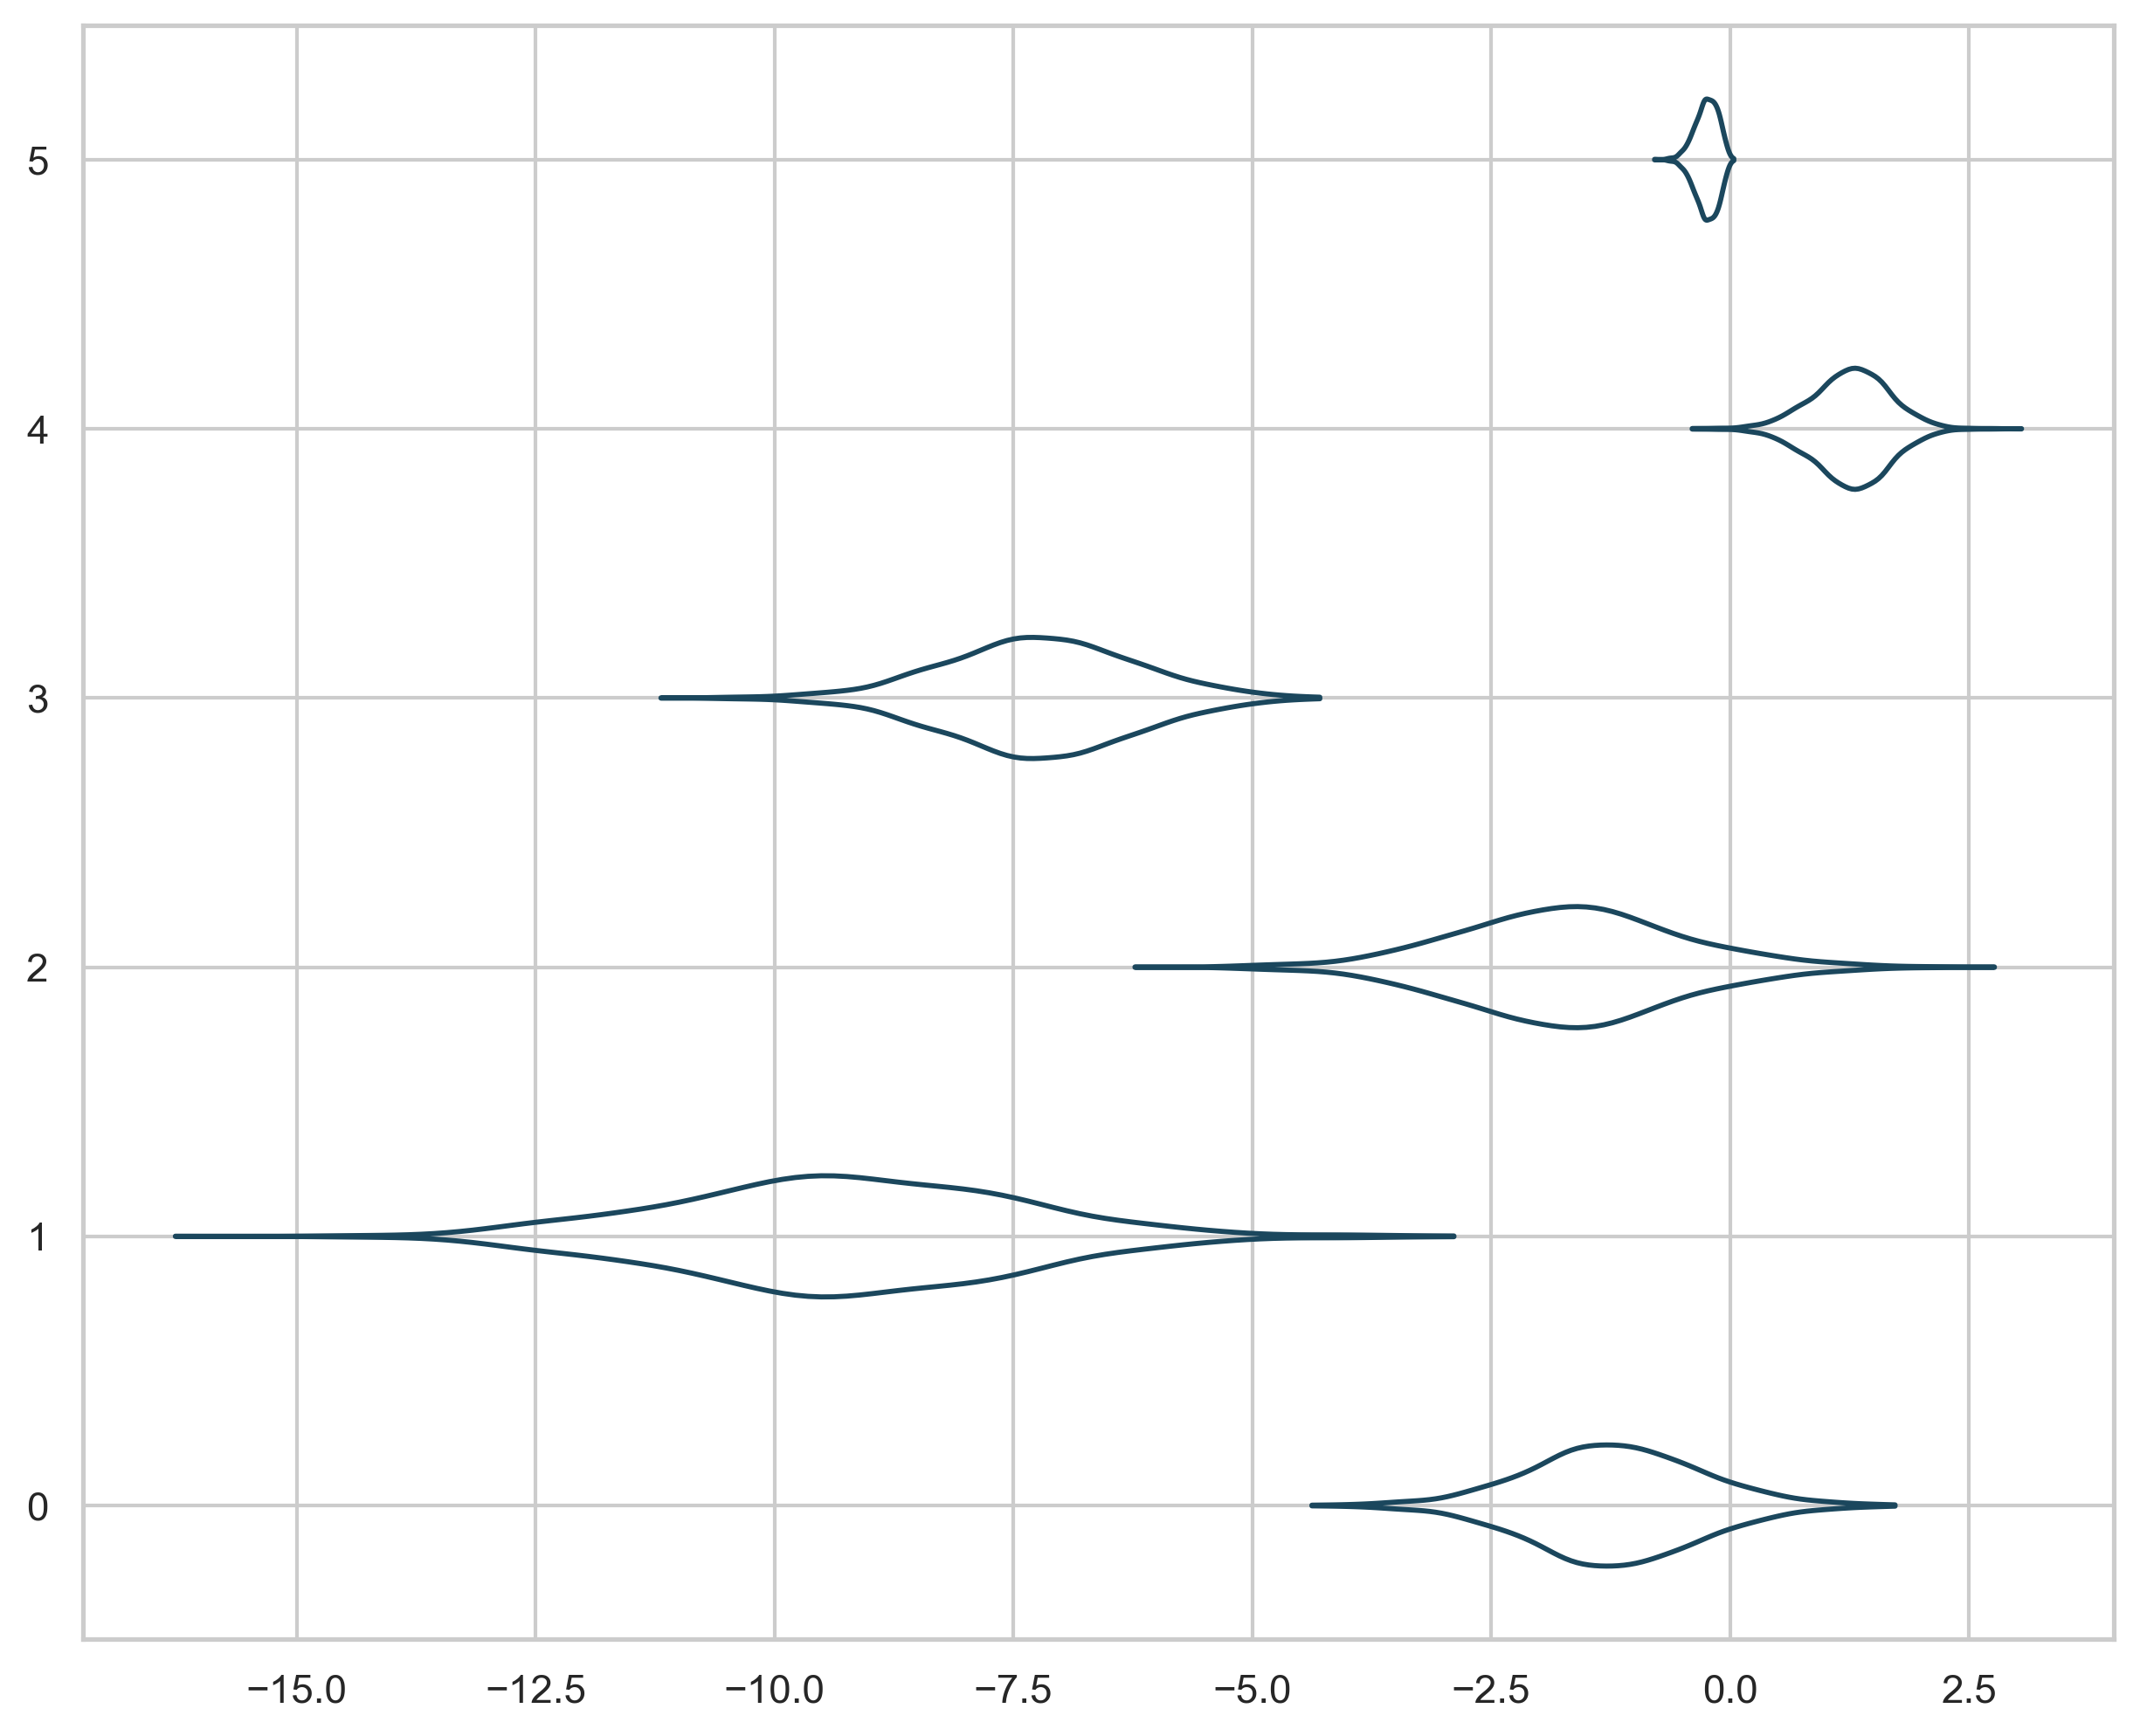

In [393]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 8))

violins = ax.violinplot(df_bootstrap_explanation_values.iloc[:, :6], positions=range(6),
                        orientation='horizontal',
                        widths=0.45,
                        bw_method="silverman",
                        showmeans=False,
                        showmedians=False,
                        showextrema=False)

for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor('#1b475d')
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

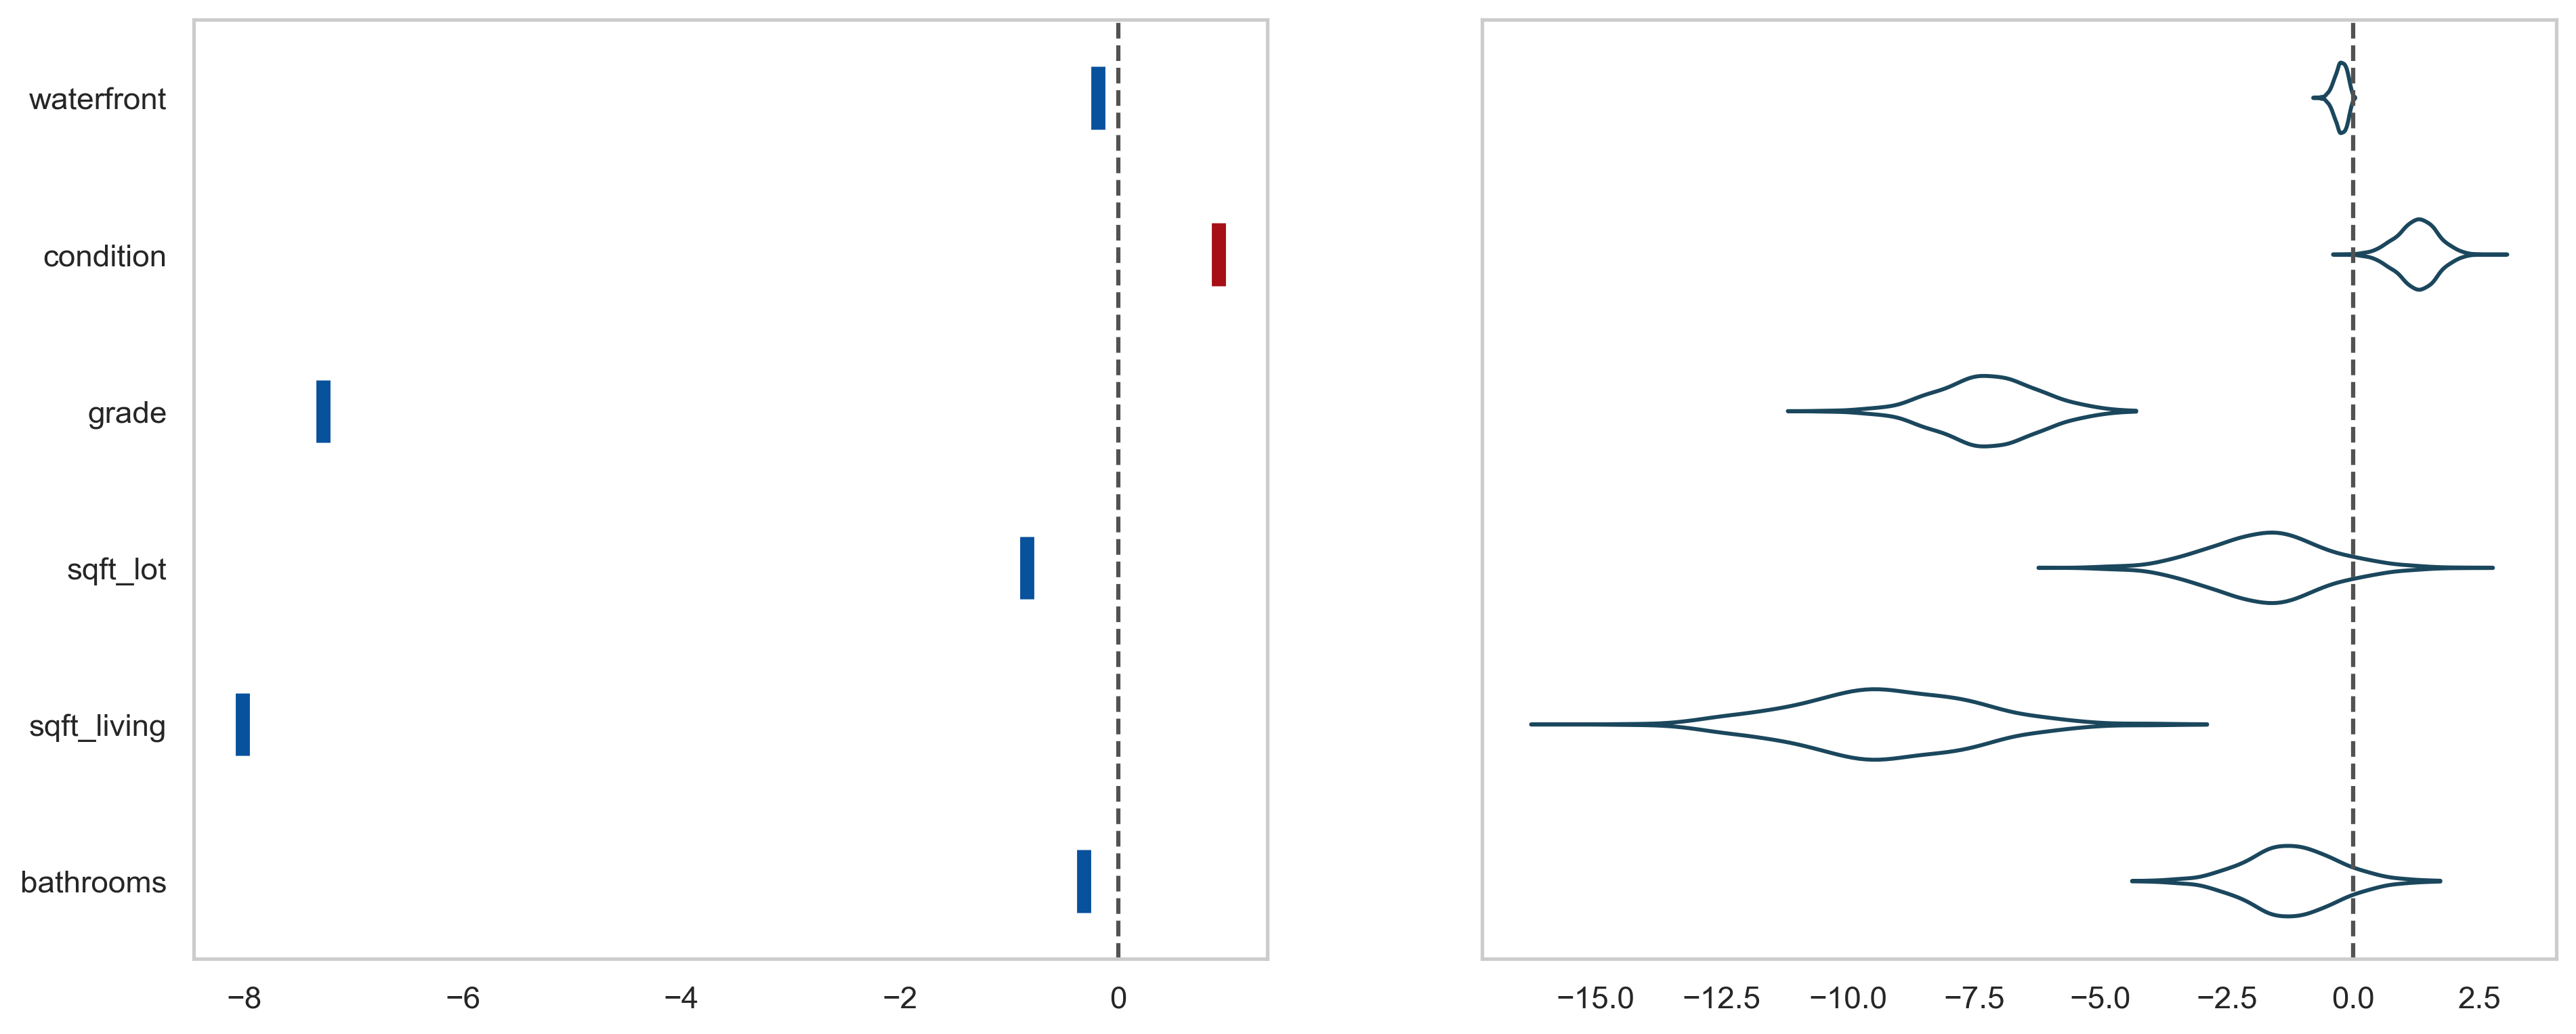

In [406]:
fig, axes = plt.subplots(ncols=2, nrows=1, dpi=300, figsize=(15, 6), sharey=True)

ax1, ax2 = axes

point_colors = ['#a50f15' if e >= 0 else '#08519c' for e in a_shap_values_one_time]

for x, y, point_color in zip(a_shap_values_one_time, range(6), point_colors):
    ax1.vlines(x, y - 0.2, y + 0.2, colors=point_color, linewidths=5)

ax1.grid(False)

ax1.axvline(0, color='#525252', linestyle='--')

ax1.set_yticks(range(6), labels=feature_names[:6])

violins = ax2.violinplot(df_bootstrap_explanation_values.iloc[:, :6],
                         positions=range(6),
                         orientation='horizontal',
                         widths=0.45,
                         bw_method="silverman",
                         showmeans=False,
                         showmedians=False,
                         showextrema=False)

ax2.grid(False)
ax2.axvline(0, color='#525252', linestyle='--')

for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor('#1b475d')
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

In [407]:
high_values = bootstrap_explanation_values.max(axis=0)
low_values = bootstrap_explanation_values.min(axis=0)

In [474]:
q5_values = np.percentile(bootstrap_explanation_values, 5, axis=0)
q95_values = np.percentile(bootstrap_explanation_values, 95, axis=0)

In [434]:
from highlight_text import ax_text, fig_text

In [416]:
low_values.min()

-16.269276957065337

In [425]:
def format_number_based_on_magnitude(num) -> str:
    if num == 0:
        return "0"
    import math
    magnitude = math.floor(math.log10(abs(num)))  # Compute order of magnitude
    decimal_places = max(0, 2 - magnitude)  # Determine the number of decimal places based on the order of magnitude
    formatted_number = f"{num:.{decimal_places}f}"  # Dynamically format the number
    return formatted_number

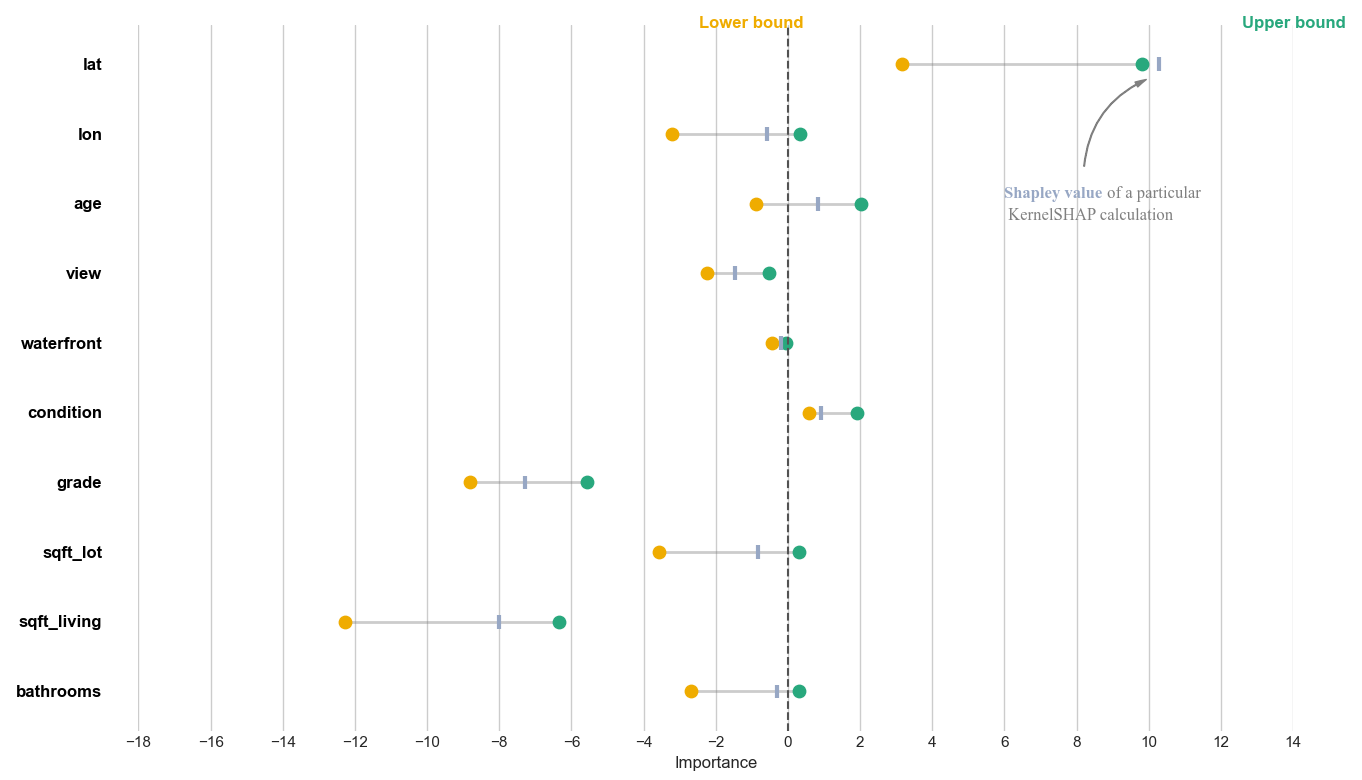

In [476]:
color_lose, color_win = '#EFAC00', '#28A87D'
color_lose_dark, color_win_dark = '#aa7c05', '#1e8563'

fig, ax = plt.subplots(figsize=(14, 8))

point_colors = ['#a50f15' if e >= 0 else '#08519c' for e in a_shap_values_one_time]

ax.hlines(y=range(len(feature_names)), xmin=q5_values, xmax=q95_values, color='grey', alpha=0.4, linewidths=2)

ax.scatter(q5_values, range(len(feature_names)), color=color_lose, zorder=3, s=80)
ax.scatter(q95_values, range(len(feature_names)), color=color_win, zorder=2, s=80)

for i, feature_name in enumerate(feature_names):
    ax_text(-19, i, f'<{feature_name}>',
            ha='right', va='center',
            highlight_textprops=[
                {"color": 'black',
                 "fontweight": 'bold',
                 "size": 12}]
            )
    high = high_values[i]
    # ax_text(high + 0.3, i,
    #         f'<{high:.2f}>',
    #         ha='left', va='center',
    #         highlight_textprops=[
    #             {"color": '#28A87D',
    #              "weight": 'light',
    #              "size": 12}])
    low = low_values[i]
    # ax_text(low - 0.3, i,
    #         f'<{low:.2f}>',
    #         ha='right', va='center',
    #         highlight_textprops=[
    #             {"color": '#EFAC00',
    #              "weight": 'light',
    #              "size": 12}])
    ax.vlines(a_shap_values_one_time[i], i - 0.1, i + 0.1, color='#97a7c4', zorder=3, linewidths=3)
    # ax_text(a_shap_values_one_time[i], i + 0.4, f'<{a_shap_values_one_time[i]:.2f}>', ha='center', va='center', highlight_textprops=[
    #             {"color": point_colors[i],
    #              "weight": 'light',
    #              "size": 12}])
ax_text(-1.03, 9.6, '<Lower bound>', ha='center', va='center', highlight_textprops=[
                {"color": '#EFAC00',
                 "weight": 'bold',
                 "size": 12}])
ax_text(14.03, 9.6, '<Upper bound>', ha='center', va='center', highlight_textprops=[
                {"color": '#28A87D',
                 'weight': 'bold',
                 'size': 12}])
ax_text(
    6, 7,
    '<Shapley value> of a particular\n KernelSHAP calculation',
    fontsize=12,
    color='grey',
    fontproperties='Times New Roman',
    ha='left', va='center',
    highlight_textprops=[
        {"color": '#97a7c4',
         "font": 'Times New Roman',
         'weight': 'bold'},
    ]
)

from matplotlib.patches import FancyArrowPatch
arrow_style = "Simple, tail_width=0.5, head_width=4, head_length=8"
connection_style = "arc3,rad=-.3"
arrow_properties = {
    "arrowstyle": arrow_style,
    "color": "grey",
}
head_position = (10, 8.8)
tail_position = (8.2, 7.5)
arrow = FancyArrowPatch(
    tail_position, head_position,
    connectionstyle=connection_style,
    **arrow_properties
)
ax.add_patch(arrow)
ax.yaxis.set_visible(False)
ax.tick_params(axis="x", bottom=False, top=False, labelbottom=True, labeltop=False, length=0)
ax.set_xticks(range(-18, 15, 2))
# ax.set_xlim(17, 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axvline(0, color='#525252', linestyle='--')
plt.tight_layout()
plt.xlabel('Importance')

plt.savefig('./bootstrapping_distribution.pdf', dpi=300, bbox_inches='tight')
# ax.set_axis_off()